In [1]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erfc
from math import sqrt

# Явная схема для линейного уравнения

In [8]:
l = 40; T = 25
N_x = 40; N_t = 401
h = l/(N_x - 1); dt = T/(N_t - 1)
x = np.arange(0, l + h, h)
t = np.arange(0, T + dt, dt)
y_previous = np.zeros(N_x)
T_0 = 300
for i in range(1):
    y_previous[i] = T_0

a = 1
sigma = a * dt / h**2 
print(sigma*2)

def getPrecise(n_t):
    res = list(map(erfc, x / (2 * sqrt(a * n_t * dt) )))
    return T_0 * np.array(res)

0.11882812500000003


C:\work\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
C:\work\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


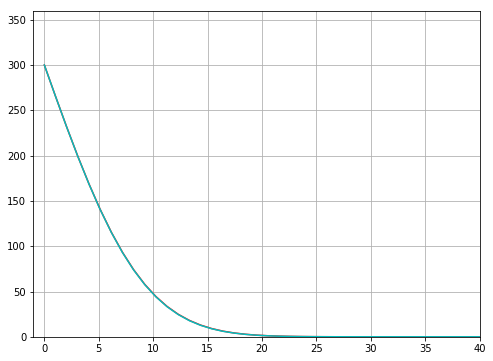

In [9]:
fig, ax = plt.subplots(figsize = (8, 6))
plt.grid(True)
xdata, y_previous = x, y_previous
In,  = plt.plot([], [], color = 'r', linestyle = '-')
In2,  = plt.plot([], [], color = 'c', linestyle = '-')


def init():
    ax.set_xlim(-h, l)
    ax.set_ylim(0, T_0 * 1.2)
    return In, 

def update_data():
    y_current = np.zeros(N_x)
    y_current[0] = T_0
    y_current[-1] = 0    
    for i_x in range(1, N_x - 1):
        y_current[i_x] = y_previous[i_x] + sigma * (y_previous[i_x + 1] - 2 * y_previous[i_x] + y_previous[i_x - 1])
    return y_current
    
def update(n_t):
    global y_previous
    global y_precise
    y_previous = update_data()
    y_precise = getPrecise(n_t)
    In.set_data(xdata, y_previous)
    In2.set_data(xdata, y_precise)
    return In, 

anim = FuncAnimation(fig, update, frames = N_t, init_func = init, interval = 60, blit = True)
HTML(anim.to_html5_video())

# Явная схема для нелинейного уравнения

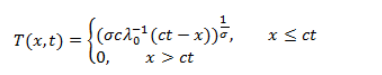

In [49]:
from tqdm import tqdm_notebook

In [80]:
h

0.45045045045045046

In [81]:
dt

0.09980239126529472

In [82]:
sigma

0.49186610511187845

Число Куранта: 6.985753643441804
T_0:  0.5045378491522288


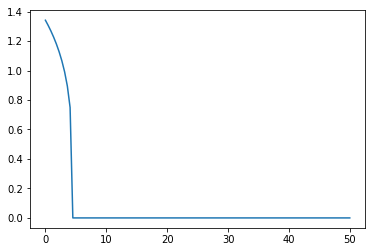

In [84]:
l = 50; T = 500
N_x = 112; N_t = 5010
h = l/(N_x - 1); dt = T/(N_t - 1)
x = np.arange(0, l + h, h)
t = np.arange(0, T + dt, dt)
y_previous = np.zeros(N_x)

a = 0.5
sigma = dt / h**2
power = 4; c = 0.09
T_0 = (power * c**2 / a) ** (1/power)
print("Число Куранта:", sigma*14.2)
print("T_0: ", T_0)

def getPrecise(n_t):
    res = np.zeros(N_x)
    for i in range(N_x):
        if(x[i] <= c * n_t * dt):
            res[i] = (power * c /a * (c*n_t * dt - x[i])) ** (1/power)        
    return res

plt.plot(x, getPrecise(500))

C:\work\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in double_scalars
C:\work\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
C:\work\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in double_scalars
C:\work\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
C:\work\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\work\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in double_scalars
C:\work\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


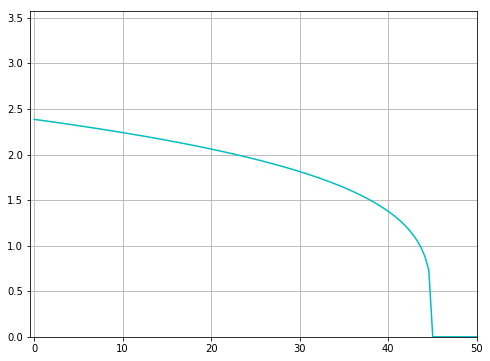

In [85]:
fig, ax = plt.subplots(figsize = (8, 6))
y_previous = np.zeros(N_x)
plt.grid(True)
xdata, y_previous = x, y_previous
In,  = plt.plot([], [], color = 'r', linestyle = '-')
In2,  = plt.plot([], [], color = 'c', linestyle = '-')

def init():
    ax.set_xlim(-h, l)
    ax.set_ylim(0, (power * c /a * c * T) ** (1/power) * 1.5)
    return In, 

def update_data(n_t):
    y_current = np.zeros(N_x)
    y_current[0] = T_0 * (n_t * dt) ** (1 / power)
    y_current[-1] = 0    
    for i_x in range(1, N_x - 1):
        if (x[i_x] - c * n_t * dt > -3):
            a_pl = a * ((y_previous[i_x])**(power) + (y_previous[i_x + 1])**(power))/2
            a_min = a * ((y_previous[i_x])**(power) + (y_previous[i_x - 1])**(power))/2            
        else:
            a_pl = 2 * a * (y_previous[i_x])**(power) * (y_previous[i_x + 1])**(power)/((y_previous[i_x])**(power) + (y_previous[i_x + 1])**(power))
            a_min = 2* a * (y_previous[i_x])**(power) * (y_previous[i_x - 1])**(power)/((y_previous[i_x])**(power) + (y_previous[i_x - 1])**(power))
        y_current[i_x] = y_previous[i_x] + sigma * ((y_previous[i_x + 1] -  y_previous[i_x]) * a_pl - (y_previous[i_x] - y_previous[i_x - 1]) * a_min)

    return y_current
    
def update(n_t):
    global y_previous
    global y_precise
    for z in range(frames_const):
        y_previous = update_data(n_t)
    y_precise = getPrecise(frames_const*n_t)
    In.set_data(xdata, y_previous)
    In2.set_data(xdata, y_precise)
#     plt.vlines(c*dt*n_t/h, 0, 3) 
    return In, 

frames_const = 1
anim = FuncAnimation(fig, update, frames = tqdm_notebook(range(N_t//frames_const)), init_func = init, interval = 30, blit = True)
HTML(anim.to_html5_video())

In [72]:
power

4

In [75]:
h, dt, sigma

(0.45045045045045046, 0.1, 0.49284)